### Sales Analysis
Dune is a reputable global retailer offering selection of products, including accessories, clothing, and phones. With a growing presence in 14 countries and a team of over 70,000 employees, the company prides itself on providing affordable options for everyone. From fashion-forward trendsetters to multi-generational families, Dune strives to offer great essentials and standout styles that cater to a wide range of customers.

As a newly appointed Data Scientist, your first task is to analyze the company's sales data from the previous year and provide actionable insights and recommendations. This analysis will help identify areas of opportunity and inform future business decisions aimed at improving performance and increasing profitability.

### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is the process of analyizing and summarizing data in order to gain insights and understanding of the underying patterns and relationships. The main objective of EDA is to identify and explore the main characteristics and patterns of the data, and identify any anomalies or outliers that impact subsequent analysis.

EDA typically incolves a number of steps, including:
1. Data cleaning - Data cleaning involves removing or correcting any errors or inconsistencies in the data, such as missing values or incorrect values.
2. Data visualization - Data visualization techniques are then used to graphically represent the data and identify any trends or patterns.
3. Statistical analysis - Statistical analysis is used to identify any relationships between variables and to test hypothesis about the data. This may involve calculating summary statistics such as mean and standard deviation, and performing tests such as correlation analysis and hypothesis testing.

In [39]:
#pip install missingno

In [40]:
# Import Libraries
import pandas as pd # Data preprocessing
import numpy as np
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import missingno as msno # Missing data - Data visualization
from collections import Counter # Counting

In [41]:
# Load Datasets
df = pd.read_csv(r"..\EDA\Dune_Sales_Data.csv")
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [42]:
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Dimensionality of the data - Exploring the number of rows and columns
df.shape


(34867, 12)

### Feature Engineering

In [44]:
# Examine the column / Features of Data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [45]:
# Investigate the dataset for nomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [46]:
# Numerical Statistical Analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [47]:
# Categorical Statistical Analysis
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


### Dealing with Missing Data:
1. MCAR (Missing completely at random): These are values that are randomly missing and do not depend on any other values.
2. MAR (Missing at random): These values are dependent on some additional features.
3. MNAR (Missing not at random): There is a reason behind why these values are missing.

There are several methods for imputing missing data, including the measure of Central Tendency, regression imputation, and multiple imputation. Measure of Central Tendency involves replacing missing values with either the Mean, Median and Mode of the variable, while regression imputation involves using other variables in the dataset to predict missing values.

In [48]:
# Investigate the missing data
null_values = df.isnull().sum()
null_values

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

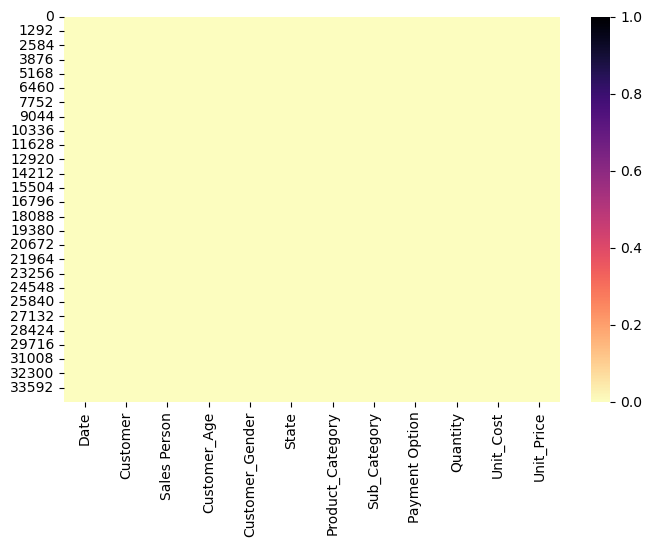

In [49]:
# Visualize missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

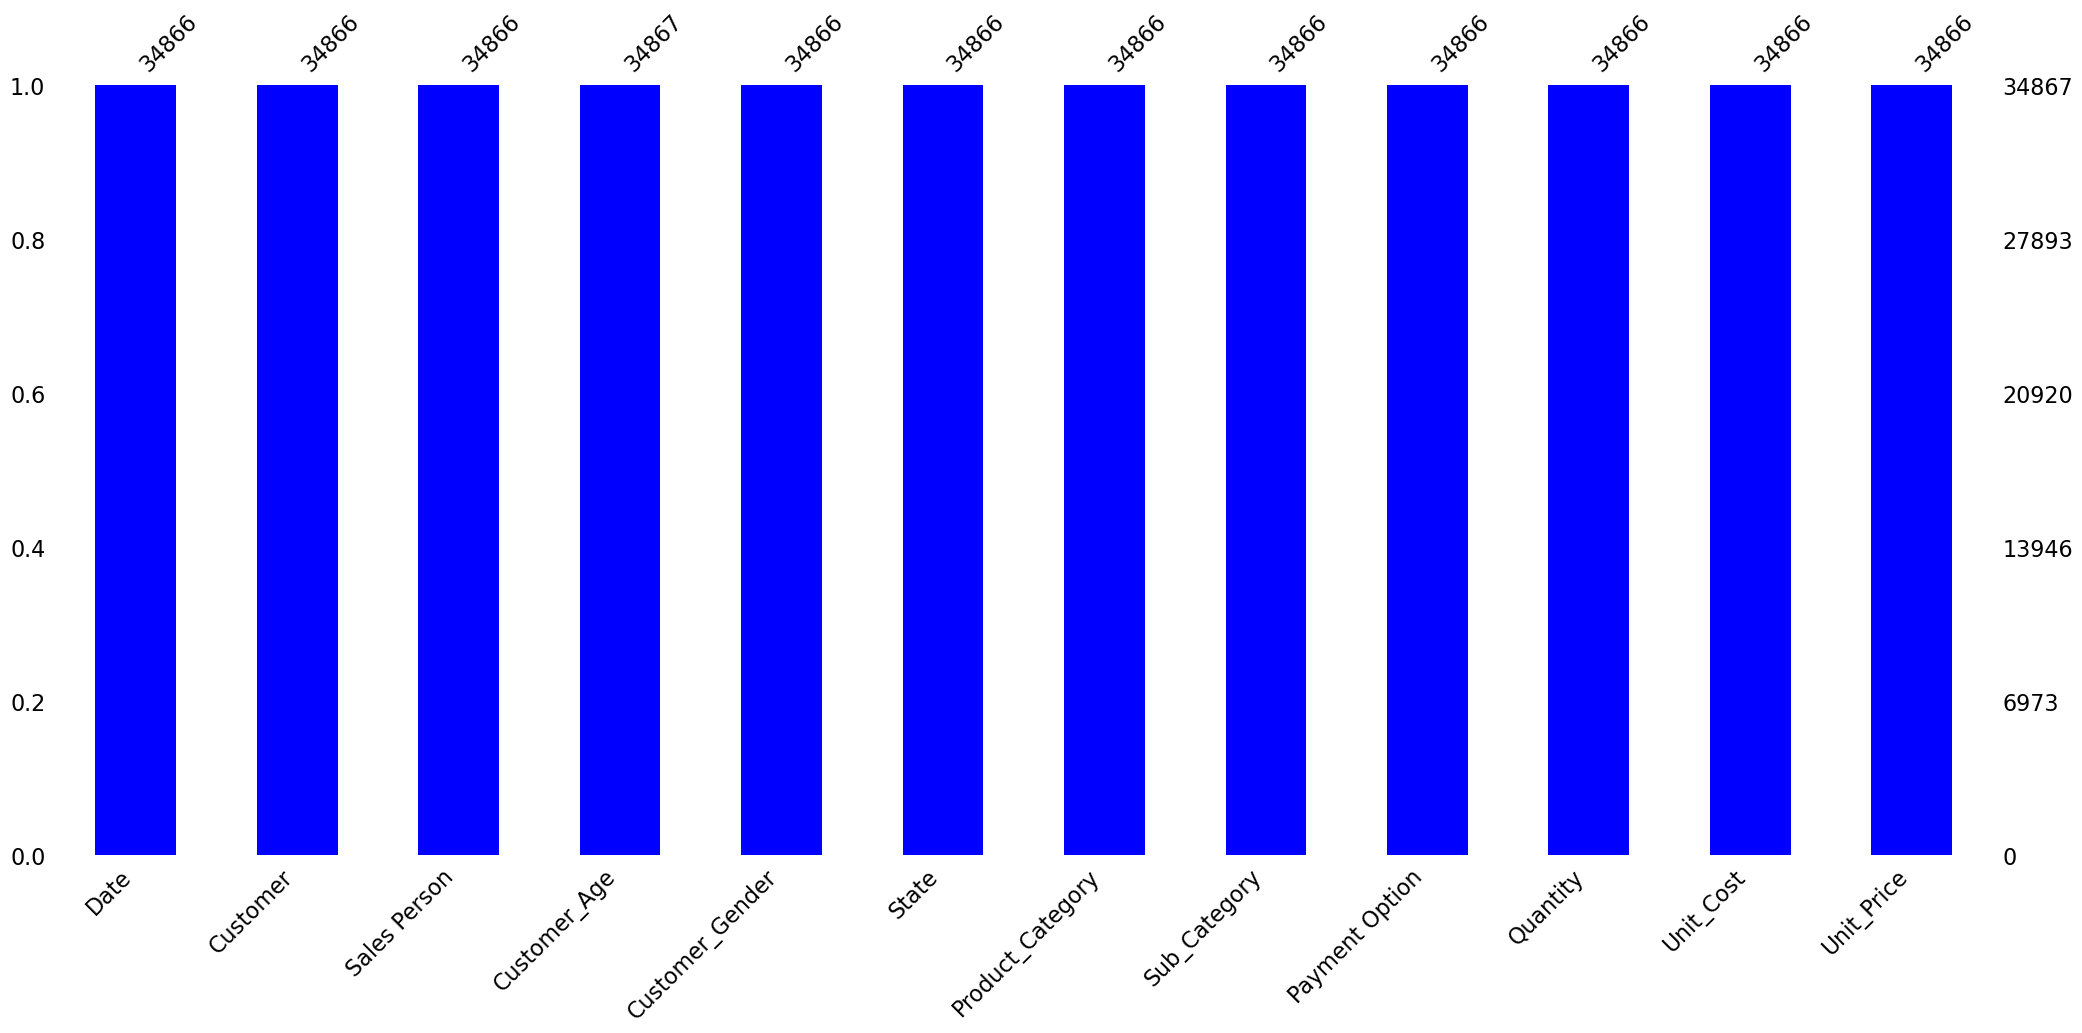

In [50]:
msno.bar(df, color="blue");

In [51]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Drop the missing Data
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [54]:
# Datetime Analysis
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [55]:
# Convert the data into a pandas datetime object
df["Date"] = pd.to_datetime(df["Date"])
#df.info()

# Extract the Year, Month, Quarter
df['Year'] = df["Date"].dt.year
df['Month'] = df["Date"].dt.month
df['Month_Name'] = df["Date"].dt.month_name()
df['Quarter'] = df["Date"].dt.quarter
df['Day'] = df["Date"].dt.dayofweek

df.head(2)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_5664\988313902.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_Name,Quarter,Day
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,4
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,5


In [56]:
# Group customer age
def age_group(x):
    if x <= 25:
        return "<= 25 Young Adult"
    elif x <= 40:
        return "25-40 Adults"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elderly"
    
# Apply function to the data
df["Age_Group"] = df["Customer_Age"].apply(age_group)
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_Name,Quarter,Day,Age_Group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,4,25-40 Adults
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,5,25-40 Adults
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,5,25-40 Adults
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,5,25-40 Adults
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,5,25-40 Adults


In [57]:
# Cost, Revenue, and Profit calculation
df["Cost"] = df["Quantity"] * df["Unit_Cost"]
df["Revenue"] = df["Quantity"] * df["Unit_Price"]
df["Profit"] = df["Revenue"] - df["Cost"]

df.head() 

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,Month_Name,Quarter,Day,Age_Group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,4,25-40 Adults,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,5,25-40 Adults,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,5,25-40 Adults,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,5,25-40 Adults,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,5,25-40 Adults,105.00,125.01,20.01


In [58]:
# Profit/Loss Grouping
def porl(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"
    
df["Profit_Loss"] = df["Profit"].apply(porl)
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_Name,Quarter,Day,Age_Group,Cost,Revenue,Profit,Profit_Loss
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,2,February,1,4,25-40 Adults,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,2,February,1,5,25-40 Adults,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,2,February,1,5,25-40 Adults,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,2016,3,March,1,5,25-40 Adults,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,3,March,1,5,25-40 Adults,105.00,125.01,20.01,Profit


### Univariate Analysis
Univariate analysis involves analyzing the distribution and summary statistics of ndividual variables/Columnfeature.
- Numerical Column/Feature = Numerical Visualization Techniques
- Categorical Column/Feature = Categorical Visualization Techniques

In [59]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'Month_Name',
       'Quarter', 'Day', 'Age_Group', 'Cost', 'Revenue', 'Profit',
       'Profit_Loss'],
      dtype='object')

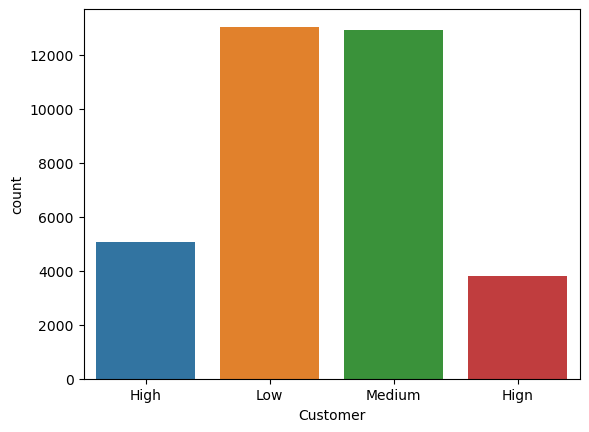

In [60]:
# How many customers belong to each customer spec
sns.countplot(x="Customer", data=df);

In [61]:
# Investigate the columns affected
df[df["Customer"] == "Hign"]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_Name,Quarter,Day,Age_Group,Cost,Revenue,Profit,Profit_Loss
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2015,8,August,3,0,25-40 Adults,2295.00,2136.00,-159.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,2015,8,August,3,1,25-40 Adults,35.00,39.00,4.00,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,2015,8,August,3,1,25-40 Adults,50.01,56.01,6.00,Profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,2015,8,August,3,0,25-40 Adults,60.00,69.00,9.00,Profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,2015,8,August,3,1,25-40 Adults,125.01,141.00,15.99,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,2016-06-05,Hign,Chinazam,40,F,Lagos,Accessories,Phone Charger,Online,1.0,...,2016,6,June,2,6,25-40 Adults,720.00,905.00,185.00,Profit
33582,2016-06-14,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,1.0,...,2016,6,June,2,1,25-40 Adults,1150.00,1638.00,488.00,Profit
33583,2016-06-19,Hign,Chinazam,40,M,Abia,Accessories,Phone Charger,Online,3.0,...,2016,6,June,2,6,25-40 Adults,3240.00,4215.99,975.99,Profit
33584,2016-06-19,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,2.0,...,2016,6,June,2,6,25-40 Adults,900.00,1022.00,122.00,Profit


In [62]:
# Correct the spelling of HIGN
df.loc[df["Customer"] == "Hign", "Customer"] = "High"

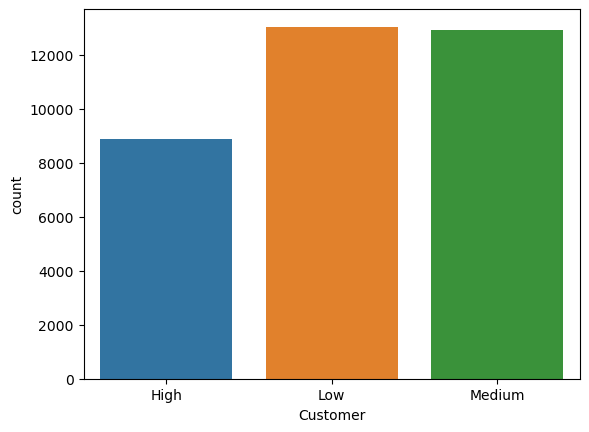

In [63]:
# How many customers belong to each customer spec
sns.countplot(x="Customer", data=df);

In [64]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

#### Observations
- Univariate analysis examines each column
- From the data, low customers were leading in the number of transactions made followed by medium customers, and lastly high customers,

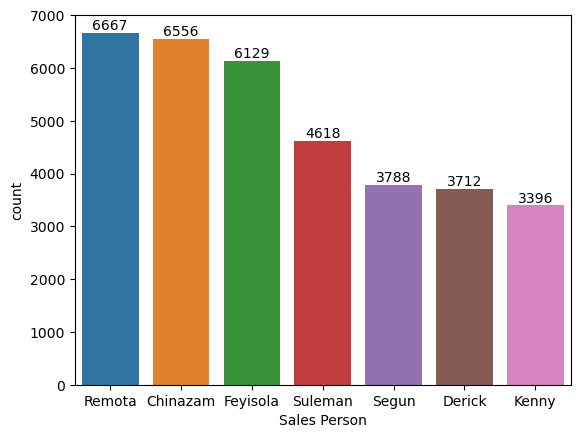

In [65]:
# Sales Person - how many transactions by sales person
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- From the dataset, Remota had the highest number of transactions.

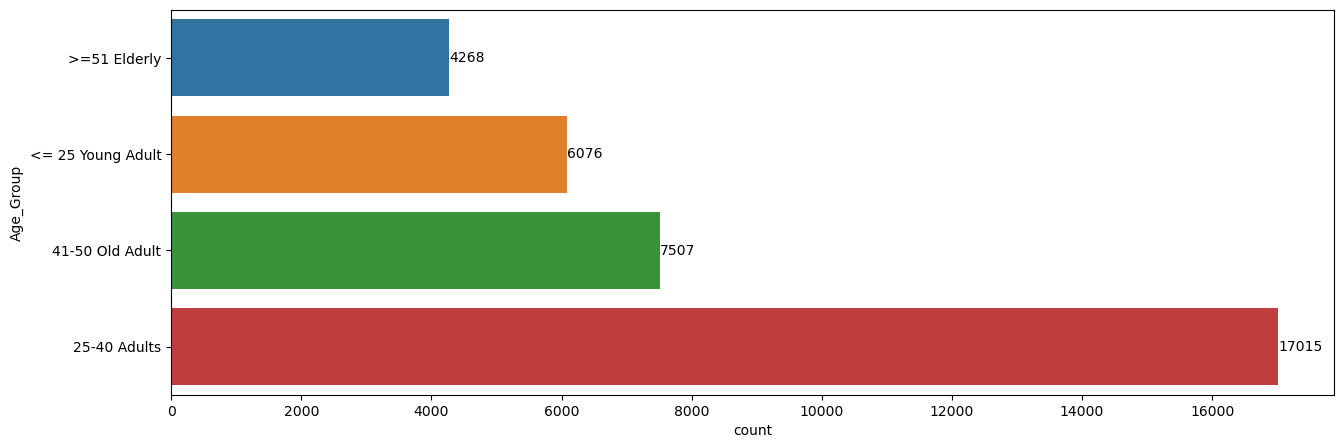

In [66]:
# Total Transactions by customer age_group
plt.figure(figsize=(15,5))
ag = sns.countplot(y=df["Age_Group"], order=df["Age_Group"].value_counts(ascending=True).index)
values = df["Age_Group"].value_counts(ascending=True).values
ag.bar_label(container=ag.containers[0], labels=values);

- Adults between the age of 25 and 40 made more transactions compared to the other remaining age groups.

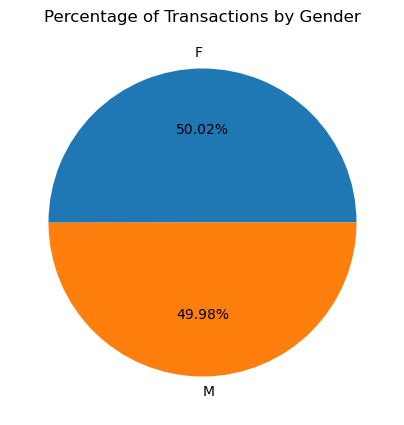

In [72]:
# Total Transactions by Customer Gender
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Transactions by Gender")
plt.show();

In [ ]:
# Total Transactions by State
sns.countplot()